In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
timing_data = pd.read_csv("timing_data/timing_data.csv")
timing_data.drop('term', axis=1, inplace=True)
timing_data.head()

,run_id,compute_proc_type,primary_memory_size,index_type,num_docs_indexed,num_tokens_indexed,search_set_base_size,search_time
0,1,Apple M2,8 GB,BST,8,4,4444,8000
1,2,Apple M2,8 GB,BST,8,4,4444,4000
2,3,Apple M2,8 GB,BST,8,4,4444,3000
3,4,Apple M2,8 GB,BST,8,4,4444,2000
4,5,Apple M2,8 GB,BST,8,4,4444,3000


Text(0.5, 1.0, 'Average Search Time by Data Structure')

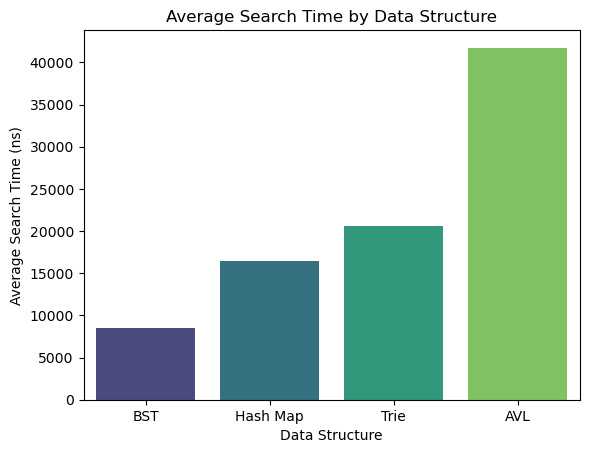

In [3]:
# Bar Chart
avg_search_time = timing_data.groupby("index_type")["search_time"].mean().sort_values()
sns.barplot(x=avg_search_time.index, y=avg_search_time.values, palette="viridis")
plt.xlabel("Data Structure")
plt.ylabel("Average Search Time (ns)")
plt.title("Average Search Time by Data Structure")

Text(0, 0.5, 'Search Time (ns)')

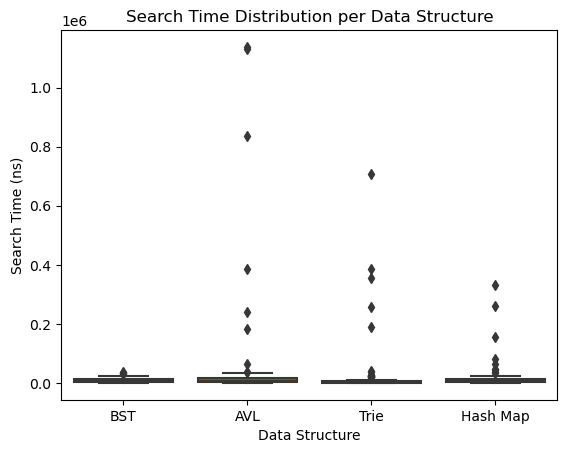

In [4]:
# Box Plot
sns.boxplot(data=timing_data, x="index_type", y="search_time", palette="viridis")
plt.title("Search Time Distribution per Data Structure")
plt.xlabel("Data Structure")
plt.ylabel("Search Time (ns)")

/var/folders/zr/drwxp7ws4sg7g_cm9_pdlrbm0000gn/T/ipykernel_60068/3645750496.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=timing_data, x="search_set_base_size", y="search_time", hue="index_type", palette="viridis", ci=None)
/Users/nidhibendre/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nidhibendre/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nidhibendre/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, y

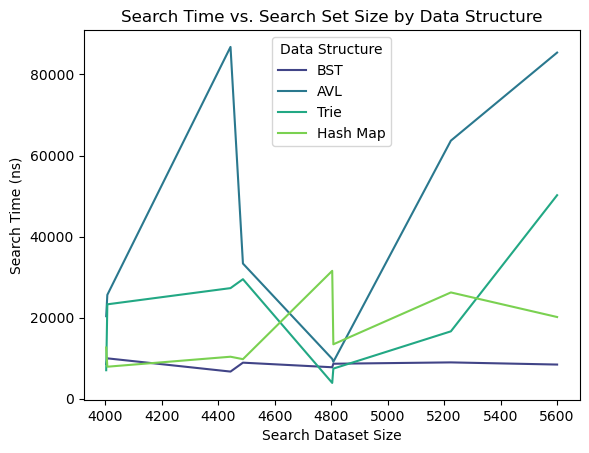

In [5]:
# Line Plot
sns.lineplot(data=timing_data, x="search_set_base_size", y="search_time", hue="index_type", palette="viridis", ci=None)
plt.xlabel("Search Dataset Size")
plt.ylabel("Search Time (ns)")
plt.title("Search Time vs. Search Set Size by Data Structure")
plt.legend(title="Data Structure")

In [6]:
from tabulate import tabulate
import pandas as pd

# Generate summary statistics
summary_table = timing_data.describe(include="all")

# Convert DataFrame to a nicely formatted table
#print(tabulate(summary_table, headers='keys', tablefmt='fancy_grid'))


# Nicely formatted summary table for Jupyter Notebook
styled_table = summary_table.style.set_properties(**{"text-align": "center"}).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("background-color", "#f4f4f4")]}
])
styled_table

,run_id,compute_proc_type,primary_memory_size,index_type,num_docs_indexed,num_tokens_indexed,search_set_base_size,search_time
count,480.000000,480,480,480,480.000000,480.000000,480.000000,480.000000
unique,nan,2,2,4,nan,nan,nan,nan
top,nan,Apple M2,8 GB,BST,nan,nan,nan,nan
freq,nan,320,320,120,nan,nan,nan,nan
mean,80.500000,nan,nan,nan,194.333333,4.000000,4672.500000,21829.166667
std,46.235306,nan,nan,nan,875.966828,0.000000,521.932254,96198.559354
min,1.000000,nan,nan,nan,0.000000,4.000000,4004.000000,0.000000
25%,40.750000,nan,nan,nan,0.000000,4.000000,4335.000000,3000.000000
50%,80.500000,nan,nan,nan,0.000000,4.000000,4646.000000,5000.000000
75%,120.250000,nan,nan,nan,3.250000,4.000000,4912.000000,13000.000000


In [8]:
grouped_summary = timing_data.groupby("index_type").agg({
    "search_time": ["mean", "median", "min", "max", "std"],
    "num_docs_indexed": ["mean", "median", "min", "max", "std"]
})

styled_table = grouped_summary.style.set_properties(**{"text-align": "center"}).set_table_styles([
    {"selector": "th", "props": [("font-size", "12pt"), ("background-color", "#f4f4f4")]}
])
styled_table